# Problem Statement: 
- Help Apollo hospitals to be more efficient, to influence diagnostic and treatment processes, to map the spread of a pandemic.

- Which variables are significant in predicting the reason for hospitalization for different regions.

- How well some variables like viral load, smoking, Severity Level describe the hospitalization charges.

In [1]:
import profile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
from statsmodels.stats import weightstats
import statsmodels.api as sm
from scipy import stats
from pandas_profiling import ProfileReport
filterwarnings('ignore')


In [1]:
pwd

'c:\\Users\\anura\\Microsoft\\PROJECT_X\\6_Apollo_Hospital_Hypotesis_Testing'

In [2]:
data = pd.read_csv('apollo_hospitals.csv')
data

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,0,19,female,yes,southwest,9.30,0,42212
1,1,18,male,no,southeast,11.26,1,4314
2,2,28,male,no,southeast,11.00,3,11124
3,3,33,male,no,northwest,7.57,0,54961
4,4,32,male,no,northwest,9.63,0,9667
...,...,...,...,...,...,...,...,...
1333,1333,50,male,no,northwest,10.32,3,26501
1334,1334,18,female,no,northeast,10.64,0,5515
1335,1335,18,female,no,southeast,12.28,0,4075
1336,1336,21,female,no,southwest,8.60,0,5020


In [3]:
data = data.drop(['Unnamed: 0'], axis= 'columns')
data

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,female,yes,southwest,9.30,0,42212
1,18,male,no,southeast,11.26,1,4314
2,28,male,no,southeast,11.00,3,11124
3,33,male,no,northwest,7.57,0,54961
4,32,male,no,northwest,9.63,0,9667
...,...,...,...,...,...,...,...
1333,50,male,no,northwest,10.32,3,26501
1334,18,female,no,northeast,10.64,0,5515
1335,18,female,no,southeast,12.28,0,4075
1336,21,female,no,southwest,8.60,0,5020


In [4]:
profile = ProfileReport(data, title="Spaceship Profiling Report")
profile.to_file(output_file= 'output.html')


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
profile.to_notebook_iframe()

In [6]:
#dropping the duplicate data
data = data.drop_duplicates()

In [7]:
data.shape

(1337, 7)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1337 non-null   int64  
 1   sex                      1337 non-null   object 
 2   smoker                   1337 non-null   object 
 3   region                   1337 non-null   object 
 4   viral load               1337 non-null   float64
 5   severity level           1337 non-null   int64  
 6   hospitalization charges  1337 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 83.6+ KB


In [9]:
data.describe()

,age,viral load,severity level,hospitalization charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,10.221249,1.095737,33197.806283
std,14.044333,2.033556,1.205571,30275.900411
min,18.000000,5.320000,0.000000,2805.000000
25%,27.000000,8.760000,0.000000,11866.000000
50%,39.000000,10.130000,1.000000,23465.000000
75%,51.000000,11.570000,2.000000,41644.000000
max,64.000000,17.710000,5.000000,159426.000000


In [10]:
data.describe(include='object')

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


In [11]:
data.isnull().sum()

age                        0
sex                        0
smoker                     0
region                     0
viral load                 0
severity level             0
hospitalization charges    0
dtype: int64

In [12]:
category_columns = ['sex', 'smoker', 'region', 'severity level']
numerical_columns = ['age', 'viral load' , 'hospitalization charges']
for col in category_columns:
    print(data[col].unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']
[0 1 3 2 5 4]


In [13]:
for col in category_columns:
    print(col,":")
    print( data[col].value_counts())

sex :
male      675
female    662
Name: sex, dtype: int64
smoker :
no     1063
yes     274
Name: smoker, dtype: int64
region :
southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64
severity level :
0    573
1    324
2    240
3    157
4     25
5     18
Name: severity level, dtype: int64


In [14]:
# Converting categorical column into category
data[category_columns] = data[category_columns].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      1337 non-null   int64   
 1   sex                      1337 non-null   category
 2   smoker                   1337 non-null   category
 3   region                   1337 non-null   category
 4   viral load               1337 non-null   float64 
 5   severity level           1337 non-null   category
 6   hospitalization charges  1337 non-null   int64   
dtypes: category(4), float64(1), int64(2)
memory usage: 47.7 KB


# Outlier Detection and Handling

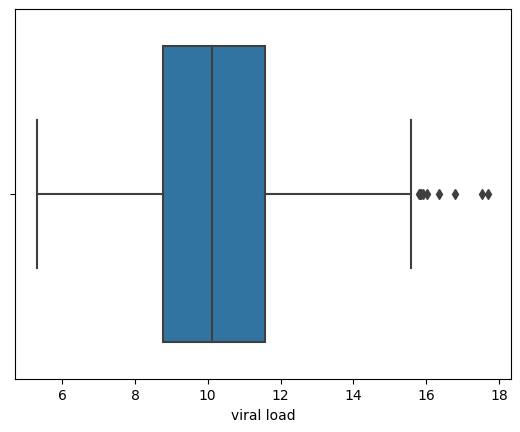

In [15]:
sns.boxplot(data['viral load'])
plt.show()

Some viral load is acting like outliers. So we wil remove those use IQR method

<AxesSubplot:xlabel='viral load', ylabel='Count'>

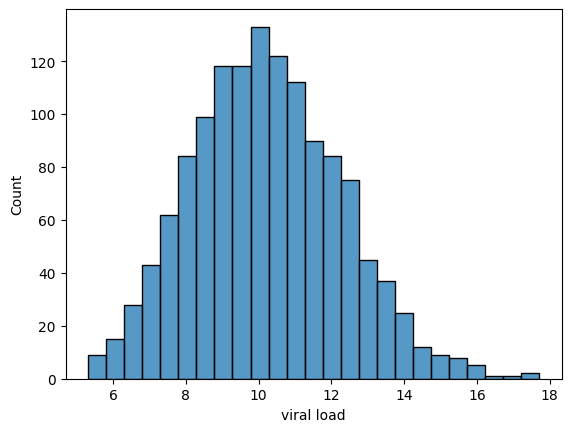

In [16]:
sns.histplot(data['viral load'])

In [17]:
q_25 = np.quantile(data['viral load'], 0.25)
q_75 = np.quantile(data['viral load'], 0.75)
iqr = q_75 - q_25
upper_limit = q_75 + iqr
lower_limit = q_25 - iqr
df = data[~((data['viral load']>upper_limit) | (data['viral load']<lower_limit))]
df.shape

(1292, 7)

In [18]:
# % of data removed as outlier
(data.shape[0] - df.shape[0])/data.shape[0]*100

3.3657442034405385

<AxesSubplot:xlabel='viral load'>

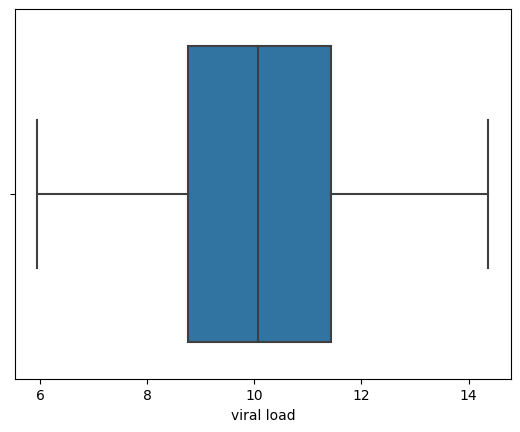

In [19]:
sns.boxplot(df['viral load'])

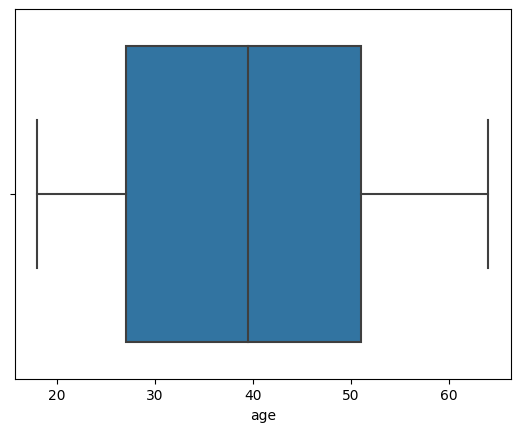

In [20]:
sns.boxplot(df['age'])
plt.show()

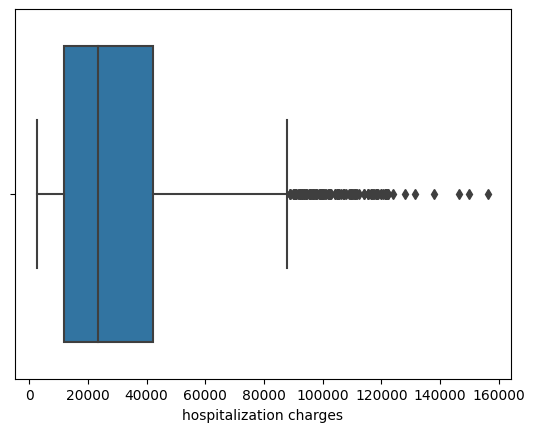

In [21]:
sns.boxplot(df['hospitalization charges'])
plt.show()

There are lot of outliers in hopitalization columns and we donot have huge dataset, so we will not remove those datapoints

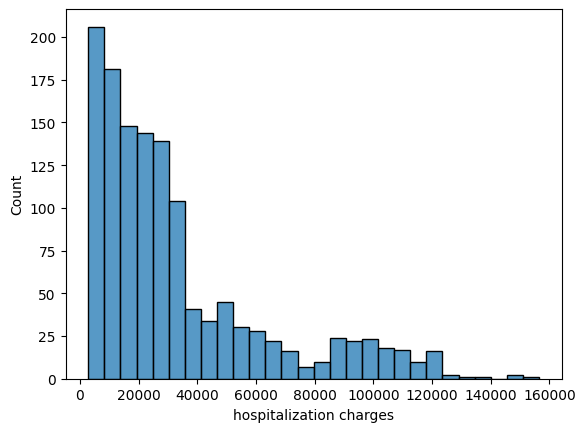

In [22]:
sns.histplot(df['hospitalization charges'])
plt.show()

Hospitalization charges are right skewed. We can fix this using log.

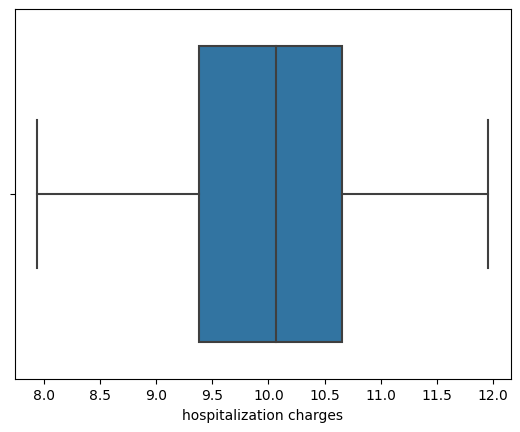

In [23]:
# since hospitalization charges is right skewed, take log to convert it in normal distribution
sns.boxplot(np.log(df['hospitalization charges']))
plt.show()

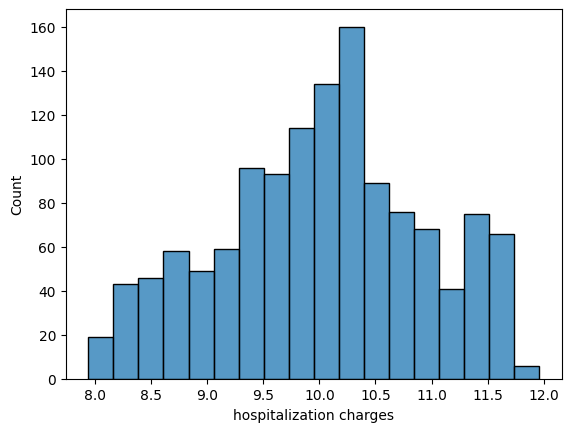

In [24]:
sns.histplot(np.log(df['hospitalization charges']))
plt.show()

In [25]:
pd.to_numeric(df['severity level'])

0       0
1       1
2       3
3       0
4       0
       ..
1333    3
1334    0
1335    0
1336    0
1337    0
Name: severity level, Length: 1292, dtype: int64

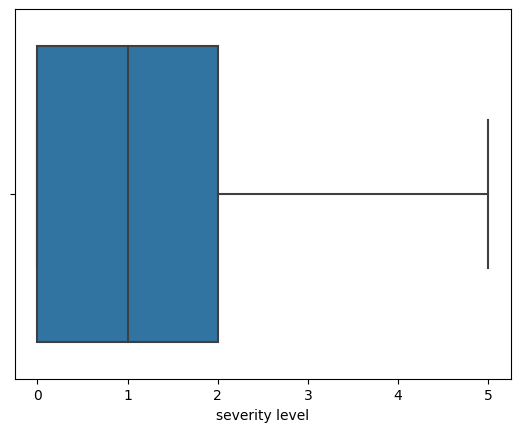

In [26]:
sns.boxplot(pd.to_numeric(df['severity level']))
plt.show()

Most of the severity level is between 0 and 2

# Univariate analysis 

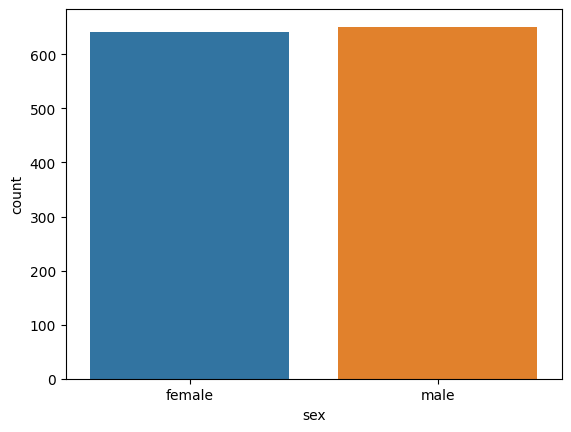

In [27]:
sns.countplot(df['sex'])
plt.show()

Both male and female are present in almost equal numbers

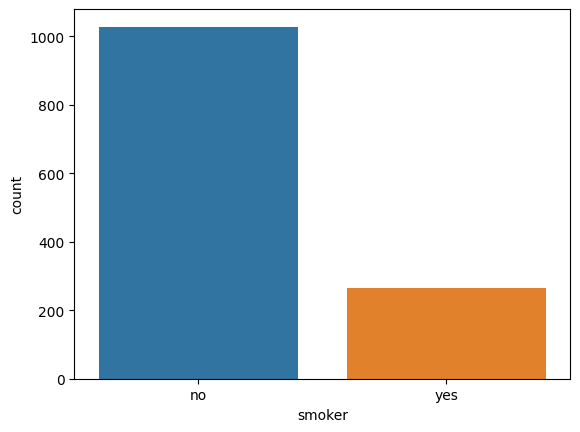

In [28]:
sns.countplot(df['smoker'])
plt.show()

There are about 19% smoker and 81% non smoker in the dataset

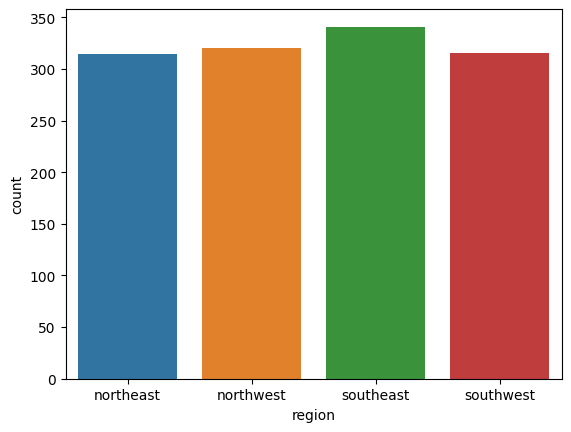

In [29]:
sns.countplot(df['region'])
plt.show()

All the four region contribute equally. But southeast region has max contribution

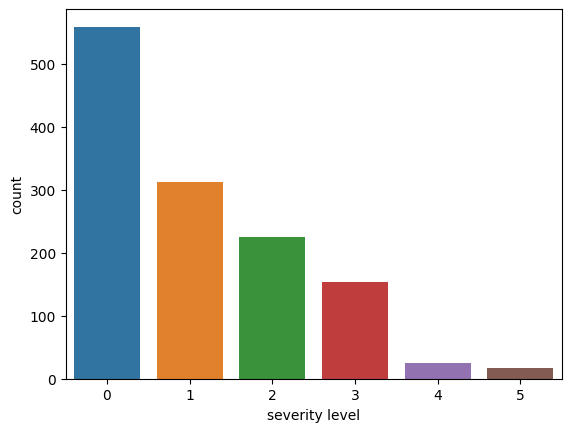

In [30]:
sns.countplot(df['severity level'])
plt.show()

Most patients have 0 severity level

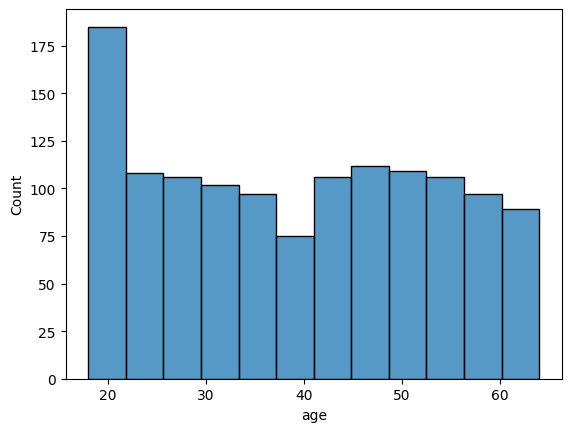

In [31]:
sns.histplot(df['age'])
plt.show()

age is almost uniformlly distributed.

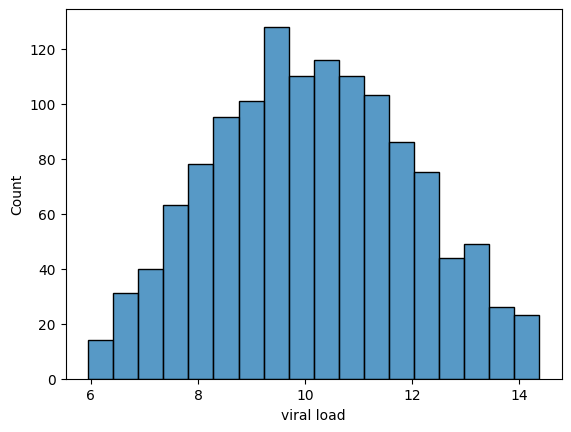

In [32]:
sns.histplot(df['viral load'])
plt.show()

A good normal distribution of viral load with 10 its mean and median

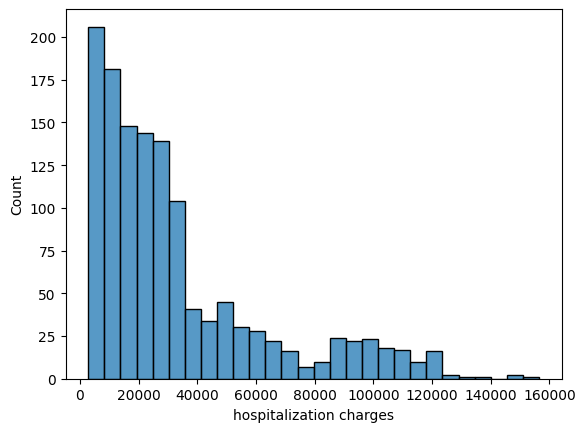

In [33]:
sns.histplot(df['hospitalization charges'])
plt.show()

# Bivariate Analysis

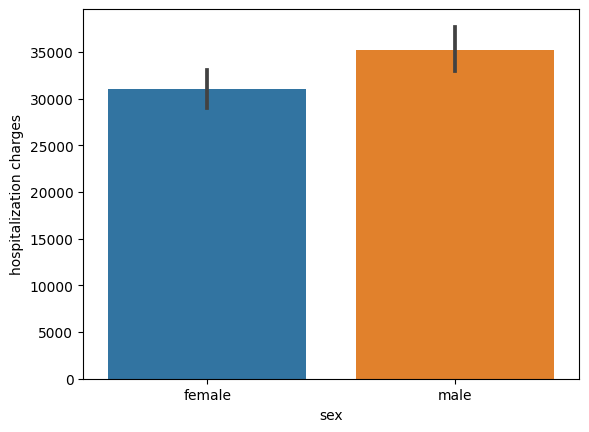

In [34]:
sns.barplot(df['sex'], df['hospitalization charges'])
plt.show()

Male are paying more for hopitalizations as compared to women

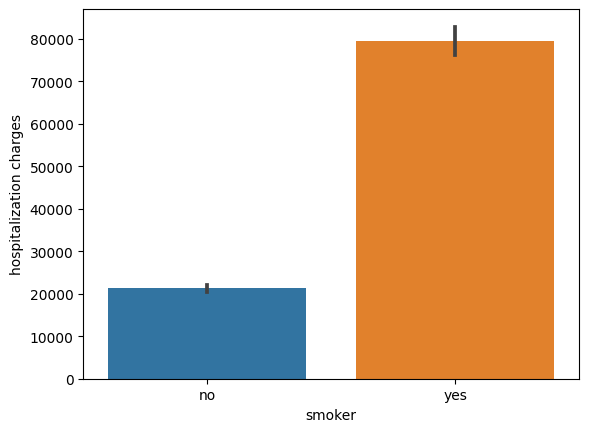

In [35]:
sns.barplot(df['smoker'], df['hospitalization charges'])
plt.show()

Smokers are paying significantly higher as compared to a non-smoker patient.

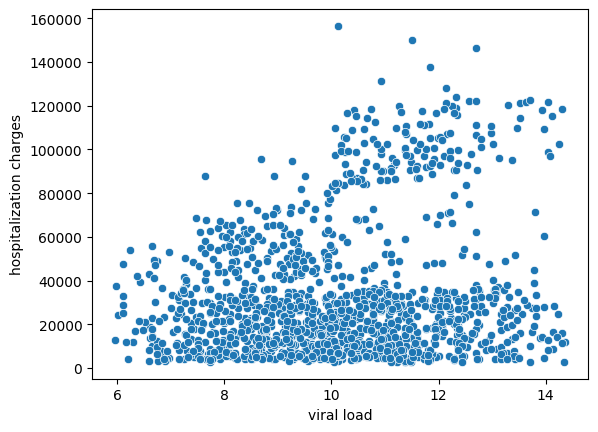

In [36]:
bins = [5,7,9,11,13,15]
sns.scatterplot(df['viral load'],df['hospitalization charges'])
plt.show()

As viral load increases hospitalization charges also increased.

In [37]:
df['viral load'].describe()

count    1292.000000
mean       10.137399
std         1.839511
min         5.950000
25%         8.770000
50%        10.070000
75%        11.440000
max        14.370000
Name: viral load, dtype: float64

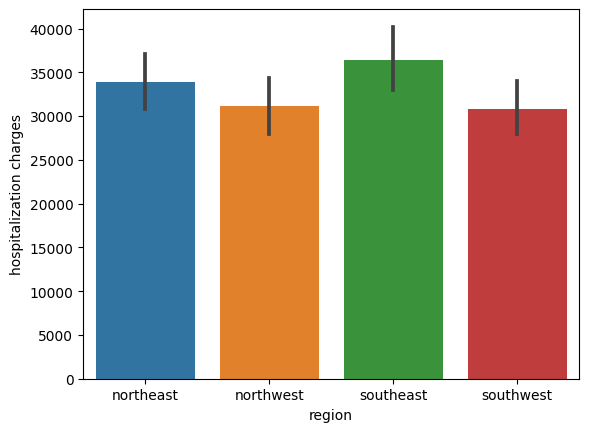

In [38]:
sns.barplot(df['region'], df['hospitalization charges'])
plt.show()

Southeast region residents are paying maximum hospitalization charges

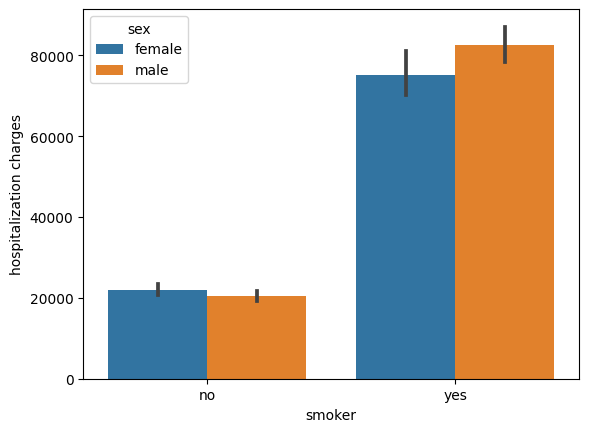

In [39]:
sns.barplot(df['smoker'], df['hospitalization charges'], hue=df['sex'])
plt.show()

Avg Male smokers are paying more hospitalization charges than avg female smokers

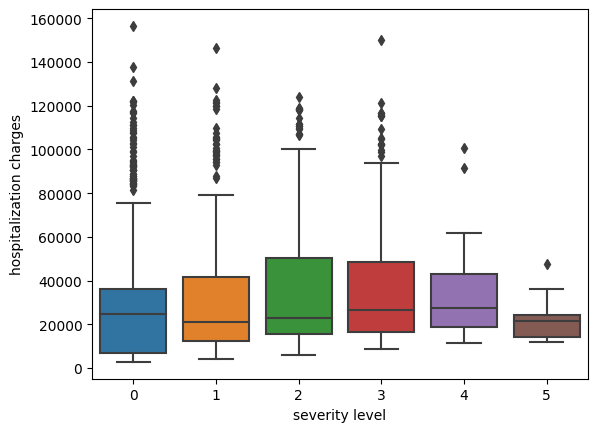

In [40]:
sns.boxplot(y = 'hospitalization charges', x='severity level', data=df)
plt.show()

There are lot of outliers in almost all severity level

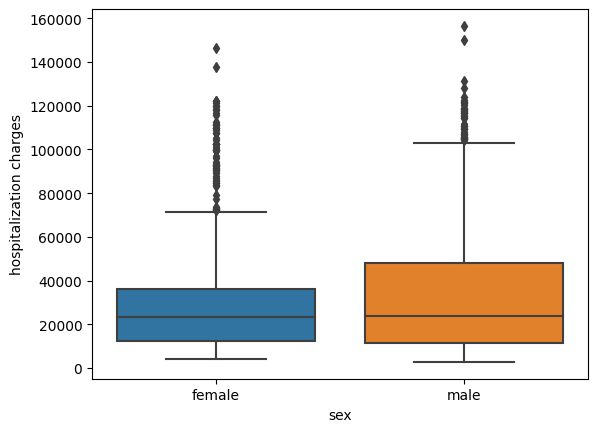

In [41]:
sns.boxplot(y = 'hospitalization charges', x='sex', data=df)
plt.show()

Median of hospitalization charges of male and female is almost same.

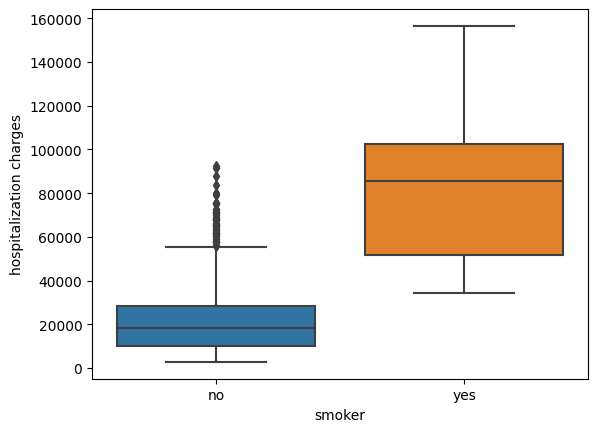

In [42]:
sns.boxplot(y = 'hospitalization charges', x='smoker', data=df)
plt.show()

Median hospitalization charges for smokers is very high as compared to a non-smoker person.

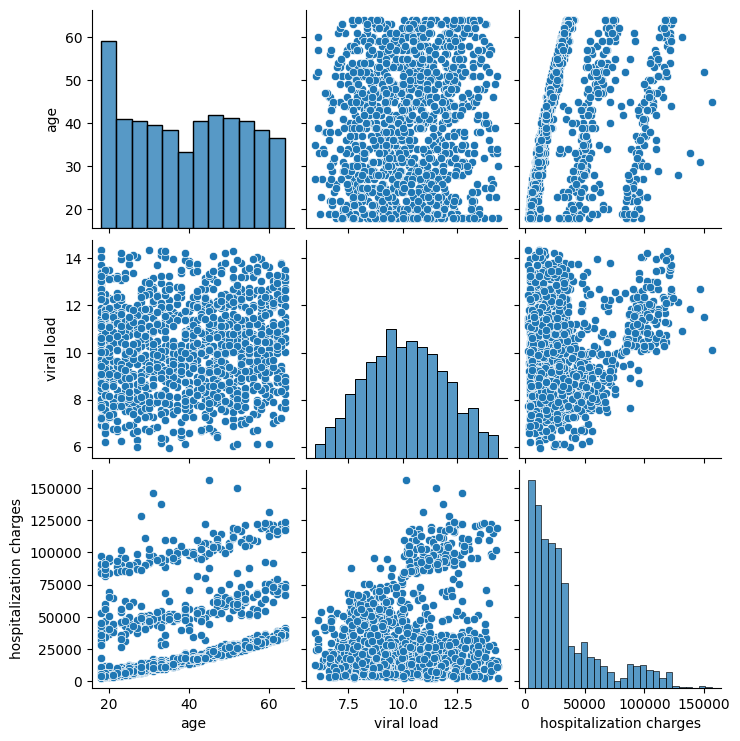

In [43]:
sns.pairplot(df)
plt.show()

# Hypothesis Testing

## Does hospitalization charges of people who do smoking are greater than those who don't?

In [44]:
df.groupby('smoker')['hospitalization charges'].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1028.0,21254.974708,15114.690466,2805.0,10096.00,18412.0,28432.50,92277.0
yes,264.0,79483.515152,28324.002821,34370.0,51916.75,85696.5,102277.75,156482.0


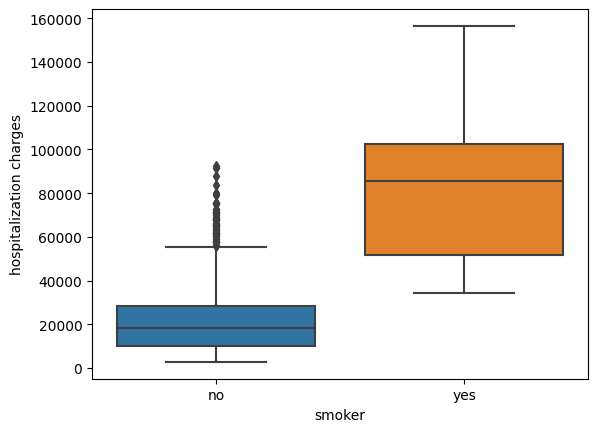

In [45]:
sns.boxplot(y = 'hospitalization charges', x='smoker', data=df)
plt.show()

We can clearly see that avg hospitalization charges for smoker is about 4 times more than a non-smoker.

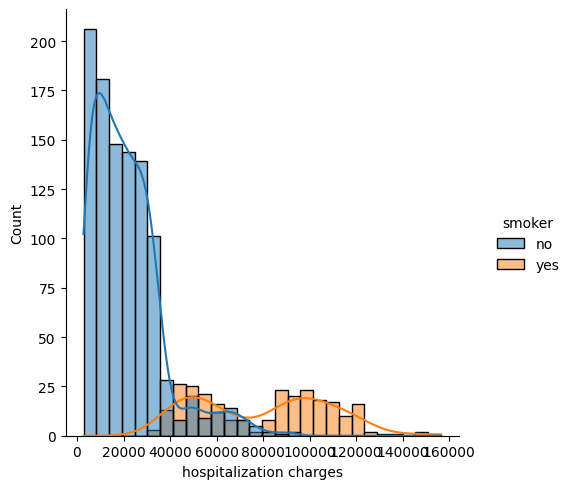

In [46]:
sns.displot(x='hospitalization charges',data = df, hue='smoker', kde= True)
plt.show()

In [47]:
df[df['smoker']=='yes']['hospitalization charges']

0        42212
11       69522
14       99029
19       92094
23       94255
         ...  
1313     90994
1314     46915
1321     70253
1323    109741
1337     72853
Name: hospitalization charges, Length: 264, dtype: int64

- Null Hypotesis, H0 : Mean Hospitalization charges for Smoker = Mean for Non-Smoker .
- Alternate Hypotesis, H1 : Hospitalization of people who do smoking is greater than those who don't.
- Apply right tail T-test
- Confindence Level = 95%
- significance level = 0.05
- Assumptions:  
1. Data is normaly distributed. 
2. Variance are equal. 
3. Two groups are independent of each other and identically distributed.

In [48]:
stats.ttest_ind(df[df['smoker']=='yes']['hospitalization charges'],df[df['smoker']=='no']['hospitalization charges'])

Ttest_indResult(statistic=45.40657901858709, pvalue=9.581158315862045e-270)

- Significance Level(0.05) > pvalue.
- Since p-value is less than significance level, we reject the Null Hypotesis(H0).
- We can conclude that Hospitalization of people who do smoking is greater than those who don't.

## Does the viral load of females is different from that of males?

In [49]:
df.groupby('sex')['viral load'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,641.0,10.062309,1.847414,5.98,8.73,9.98,11.33,14.37
male,651.0,10.211336,1.830104,5.95,8.80,10.17,11.48,14.34


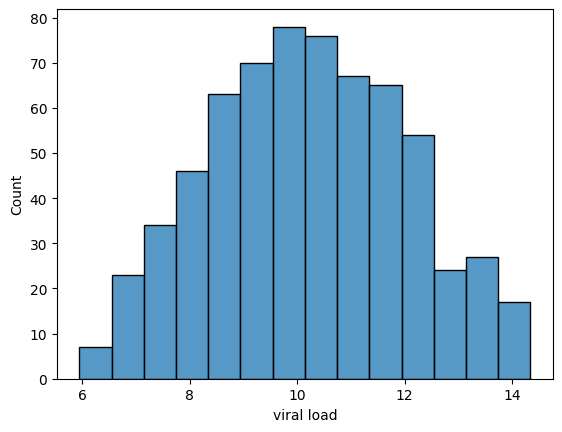

In [50]:
sns.histplot(df[df['sex']=='male']['viral load'])
plt.show()

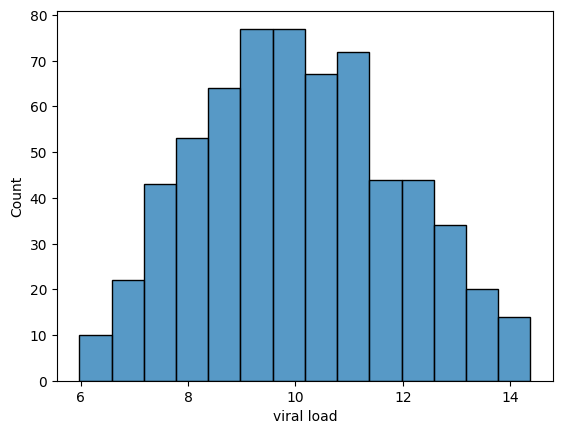

In [51]:
sns.histplot(df[df['sex']=='female']['viral load'])
plt.show()

###  QQ plots to compare the distribution of continuous variables with standard distributions.

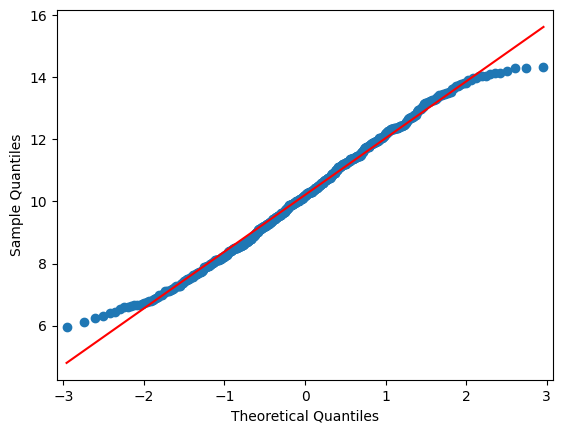

In [52]:
sm.qqplot(df[df['sex']=='male']['viral load'], line='s')
plt.show()

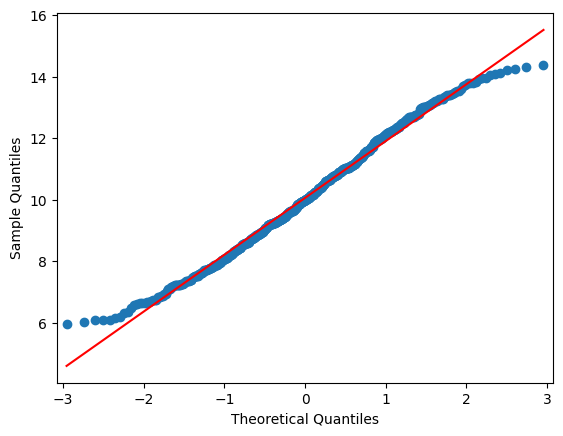

In [53]:
sm.qqplot(df[df['sex']=='female']['viral load'], line='s')
plt.show()

### Normalitly check using Shapiro-wilk test
- Ho(Accepted): Sample is from the normal distributions.(Po>0.05)
- Ha(Rejected): Sample is not from the normal distributions.

In [54]:
stats.shapiro(df[df['sex']=='female']['viral load'])

ShapiroResult(statistic=0.9897120594978333, pvalue=0.00018344582349527627)

the p-value is 0.00018 which is less than the alpha(0.05) then we reject the null hypothesis.
Sample is not normally distributed

In [55]:
stats.shapiro(df[df['sex']=='male']['viral load'])

ShapiroResult(statistic=0.9907006025314331, pvalue=0.00039878979441709816)

the p-value is 0.0003 which is less than the alpha(0.05) then we reject the null hypothesis.
Sample is not normally distributed

### Mann-Whitney U Test

- H0: the distributions of both samples are equal.
- H1: the distributions of both samples are not equal.
- Assumptions

1. Observations in each sample are independent and identically distributed (iid).
2. Observations in each sample can be ranked.

In [56]:
stats.mannwhitneyu(df[df['sex']=='female']['viral load'],df[df['sex']=='male']['viral load'])

MannwhitneyuResult(statistic=198713.0, pvalue=0.1385546770149327)

- Significance Level(0.05) < pvalue.
- Since p-value is more than significance level, we cannot reject the Null Hypotesis(H0).
- We can conclude that there is no difference viral load of females and viral load of males.

### Student T-test
- Null Hypotesis, H0 : Mean for viral load of females = Mean for viral load of males .
- Alternate Hypotesis, H1 : There is a difference in viral load of females and viral load of males . Mean for viral load of females != Mean for viral load of males 
- Confindence Level = 95%
- significance level = 0.05
- Assumptions:  
1. Data is normaly distributed. 
2. Variance are equal. 
3. Two groups are independent of each other and identically distributed.

In [57]:
stats.ttest_ind(df[df['sex']=='female']['viral load'],df[df['sex']=='male']['viral load'])

Ttest_indResult(statistic=-1.4566020534570518, pvalue=0.14546960861170005)

- Significance Level(0.05) < pvalue.
- Since p-value is more than significance level, we cannot reject the Null Hypotesis(H0).
- We can conclude that there is no difference viral load of females and viral load of males.

## Is the proportion of smoking significantly different across different regions?

- Null Hypotesis, H0 : There is a no relationship of proportion of smoking across different regions
- Alternate Hypotesis, H1 : the proportion of smoking significantly related among different regions.
- Confindence Level = 95%
- significance level = 0.05
- Assumptions:  
1. Observations used in the calculation of the contingency table are independent.
2. 25 or more examples in each cell of the contingency table.

In [58]:
contingency = pd.crosstab(df['smoker'], df['region'], normalize='index')*100
contingency

region,northeast,northwest,southeast,southwest
smoker,,,,
no,24.319066,25.583658,24.902724,25.194553
yes,24.621212,21.590909,32.196970,21.590909


In [59]:
chi2,p_value, dof, expected_value =  stats.chi2_contingency(contingency)
p_value

0.6709665482835236

- Significance Level(0.05) < pvalue.
- Since p-value is more than significance level, we cannot reject the Null Hypotesis(H0).
- We can conclude that There is a no relationship of proportion of smoking across different regions.

## Is the mean viral load of women with 0 Severity level, 1 Severity level, and 2 Severity level the same? 

In [60]:
df_women = df[df['sex']=='female']
df_women

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,female,yes,southwest,9.30,0,42212
5,31,female,no,southeast,8.58,0,9392
6,46,female,no,southeast,11.15,1,20601
7,37,female,no,northwest,9.25,3,18204
9,60,female,no,northwest,8.61,0,72308
...,...,...,...,...,...,...,...
1331,23,female,no,southwest,11.13,0,26990
1334,18,female,no,northeast,10.64,0,5515
1335,18,female,no,southeast,12.28,0,4075
1336,21,female,no,southwest,8.60,0,5020


In [61]:
df_women[df_women['severity level']==0]['viral load']

0        9.30
5        8.58
9        8.61
11       8.76
13      13.27
        ...  
1331    11.13
1334    10.64
1335    12.28
1336     8.60
1337     9.69
Name: viral load, Length: 282, dtype: float64

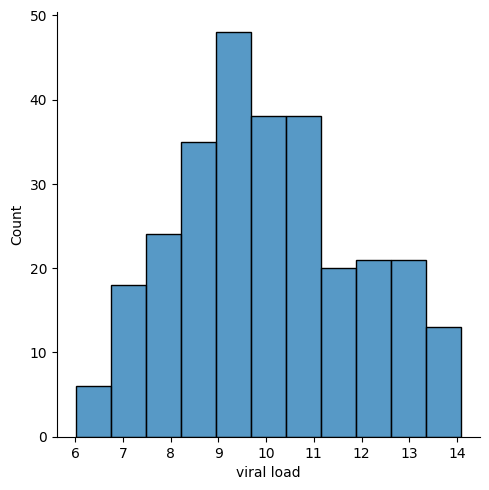

In [62]:
sns.displot(df_women[df_women['severity level']==0]['viral load'])
plt.show()

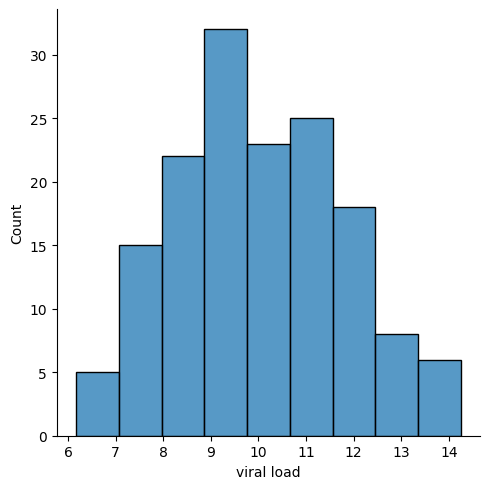

In [63]:
sns.displot(df_women[df_women['severity level']==1]['viral load'])
plt.show()

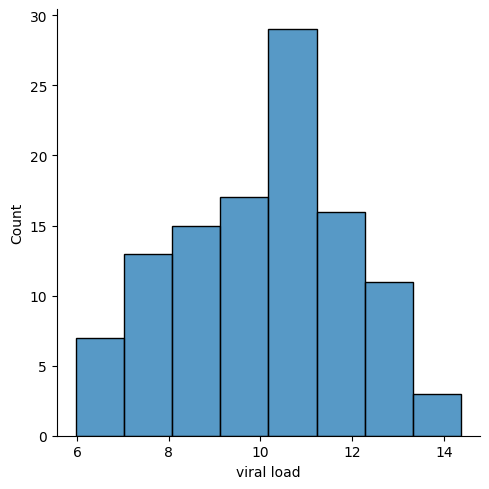

In [64]:
sns.displot(df_women[df_women['severity level']==2]['viral load'])
plt.show()

In [65]:
df_women['severity level'].value_counts()

0    282
1    154
2    111
3     76
4     11
5      7
Name: severity level, dtype: int64

In [66]:
df_women.groupby('severity level')['viral load'].describe()

,count,mean,std,min,25%,50%,75%,max
severity level,,,,,,,,
0,282.0,10.062660,1.864373,6.02,8.7325,9.970,11.3225,14.08
1,154.0,10.005779,1.794043,6.17,8.7150,9.855,11.2625,14.25
2,111.0,10.106757,1.870028,5.98,8.6700,10.300,11.4150,14.37
3,76.0,10.083421,1.877414,6.33,8.7325,10.070,11.3700,14.31
4,11.0,10.647273,1.728746,8.53,9.6400,9.880,11.1700,13.82
5,7.0,9.438571,2.197418,6.10,8.0200,9.530,11.0350,12.33


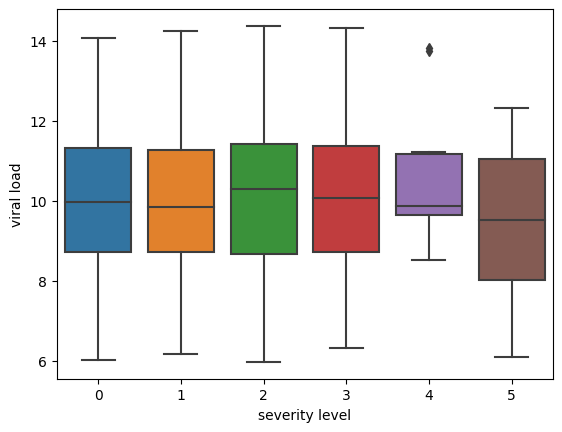

In [67]:
sns.boxplot(y = 'viral load', x='severity level', data=df_women)
plt.show()

### Normalitly check using Shapiro-wilk test
- Ho(Accepted): Sample is from the normal distributions.(Po>0.05)
- Ha(Rejected): Sample is not from the normal distributions.

In [68]:
stats.shapiro(df_women[df_women['severity level']==0]['viral load'])

ShapiroResult(statistic=0.9839955568313599, pvalue=0.003048470476642251)

the p-value is 0.003 which is less than the alpha(0.05) then we reject the null hypothesis.
Sample is not normally distributed

In [69]:
stats.shapiro(df_women[df_women['severity level']==1]['viral load'])

ShapiroResult(statistic=0.9874054789543152, pvalue=0.17910027503967285)

the p-value is 0.179 which is greater than the alpha(0.05) then we failed to reject the null hypothesis.
Sample is normally distributed

In [70]:
stats.shapiro(df_women[df_women['severity level']==2]['viral load'])

ShapiroResult(statistic=0.9838616847991943, pvalue=0.201752707362175)

the p-value is 0.201 which is greater than the alpha(0.05) then we failed to reject the null hypothesis.
Sample is normally distributed

### Kruskal-Wallis H Test

- H0: the distributions of all samples are equal.
- H1: the distributions of one or more samples are not equal.
- Assumptions

1. Observations in each sample are independent and identically distributed (iid).
2. Observations in each sample can be ranked.

In [71]:
stats.kruskal(df_women[df_women['severity level']==0]['viral load'],
            df_women[df_women['severity level']==1]['viral load'],
            df_women[df_women['severity level']==2]['viral load'])

KruskalResult(statistic=0.4164304161369583, pvalue=0.8120322620115005)

- Significance Level(0.05) < pvalue.
- Since p-value is more than significance level, we cannot reject the Null Hypotesis(H0).
- We can conclude that Severity Level has no effect on the Viral Load. Mean for Severity Level1 = Mean for Severity Level2 = Mean for Severity Level0.

### Levene’s test is used to assess the equality of variance
- H0: The null hypothesis for Levene’s test is that the variance among groups is equal.
- Ha: The alternative hypothesis is that the variance among different groups is not equal (for at least one pair the variance is not equal to others).


- Assumptions
- The samples from the populations under consideration are independent.
- The populations under consideration are approximately normally distributed.

In [72]:
stats.levene(df_women[df_women['severity level']==0]['viral load'],
            df_women[df_women['severity level']==1]['viral load'],
            df_women[df_women['severity level']==2]['viral load'])

LeveneResult(statistic=0.22108766351649103, pvalue=0.8017183962178714)

- Significance Level(0.05) < pvalue.
- Since p-value is more than significance level, we cannot reject the Null Hypotesis(H0).
- We can conclude that Variance of all samples are equal.

### f_oneway ANOVA test
- Null Hypotesis, H0 : Severity Level has no effect on the Viral Load. Mean for Severity Level1 = Mean for Severity Level2 = Mean for Severity Level0
- Alternate Hypotesis, H1 : There is an effect of Severity Level on Viral Load. Mean for Severity Levels are not same
- Confindence Level = 95%
- significance level = 0.05
- Assumptions:  
1. Data is normaly distributed. 
2. Groups are independent of each other.
3. Observations in each sample have the same variance.

In [73]:
stats.f_oneway(df_women[df_women['severity level']==0]['viral load'],
            df_women[df_women['severity level']==1]['viral load'],
            df_women[df_women['severity level']==2]['viral load'])

F_onewayResult(statistic=0.10076724739355107, pvalue=0.904160322432226)

- Significance Level(0.05) < pvalue.
- Since p-value is more than significance level, we cannot reject the Null Hypotesis(H0).
- We can conclude that Severity Level has no effect on the Viral Load. Mean for Severity Level1 = Mean for Severity Level2 = Mean for Severity Level0.

# Business Insights and Recommendations

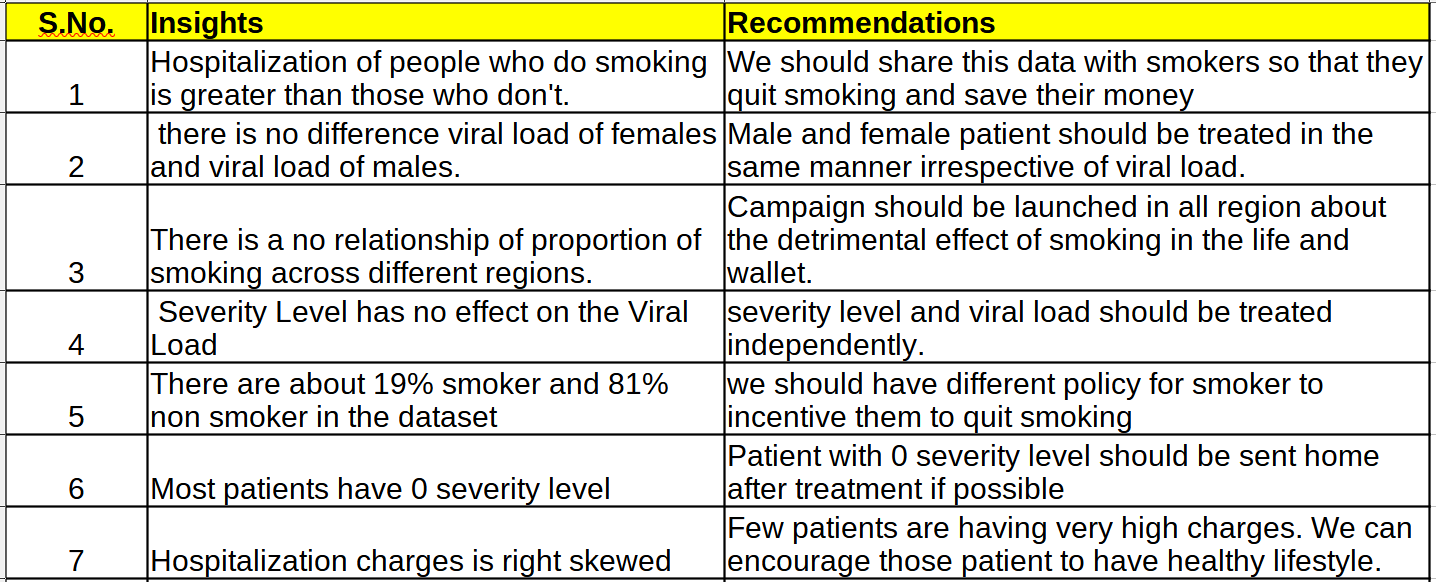